<img src='https://www.unifor.br/o/unifor-theme/images/unifor-logo-horizontal.svg' width="250px">

# Ciência de Dados

Prof. Túlio Ribeiro<br>
Laboratório de Ciência de Dados e Inteligência Artificial (LCDIA)<br>
Universidade de Fortaleza

## 1. Regressão Polinomial

De forma geral, o modelo de regressão polinomial é definido pela suposição de que o valor alvo previsto $\widehat{y}$ é dado por uma combinação linear entre os parâmetros do modelo $\{\theta_i\}$ e todas as combinações possíveis até o grau $d$ dos atributos $\{x_i\}$. Por exemplo, para $n = 1$ e $d = 2$, teremos:

\begin{equation}
\widehat{y} = \theta_0+\theta_1 x_1 + \theta_2 x_1^2.
\end{equation}


In [ ]:
import numpy as np

np.random.seed(42)

m = 100 # número de instâncias

X = 6 * np.random.rand(m, 1) - 3 # simulando valores para a matriz de características (contendo apenas uma característica)
y = 2 + X + 0.5 * X ** 2 + np.random.randn(m, 1) # simulando valores para o valor alvo

In [ ]:
X.shape, y.shape

((100, 1), (100, 1))

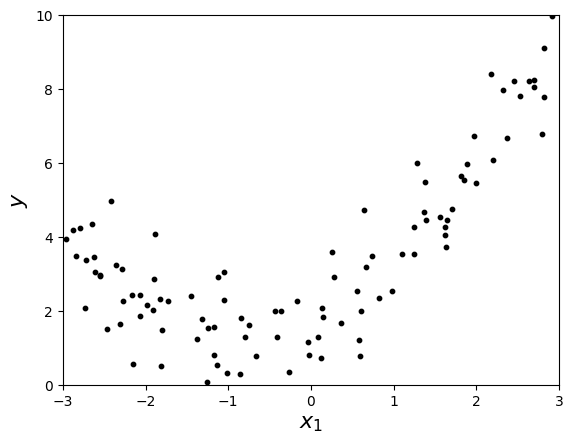

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X, y, color = '#000000', s = 10)

plt.xlabel('$x_1$', fontsize = 16)
plt.ylabel('$y$', fontsize = 16)

plt.axis([-3, 3, 0, 10])
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 2,
                                   include_bias = False) # Gerar a matriz sem a coluna de 1's

X_poly = poly_features.fit_transform(X) # Matriz X + termos quadráticos

print(X[0])
print(X_poly[0])

[-0.75275929]
[-0.75275929  0.56664654]


In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y.ravel())

print(lin_reg.intercept_, lin_reg.coef_)

1.7813458120291457 [0.93366893 0.56456263]


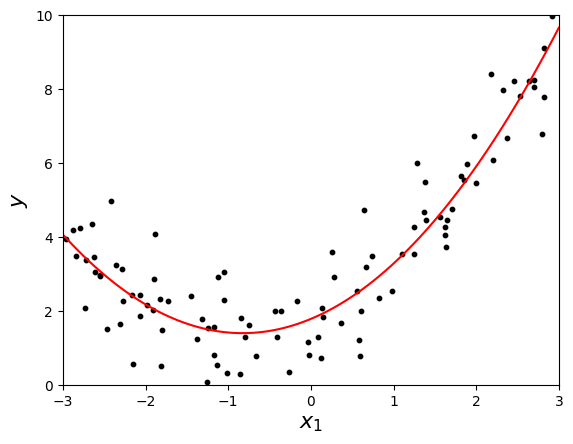

In [ ]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)

X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.scatter(X, y, color = '#000000', s = 10)
plt.plot(X_new, y_new, '#FF0000', ls = '-')

plt.xlabel('$x_1$', fontsize = 16)
plt.ylabel('$y$', fontsize = 16)

plt.axis([-3, 3, 0, 10])
plt.show()

Lembrando que o ``PolynomialFeatures()`` transforma a matriz com $n$ características em uma matriz com $\displaystyle\frac{(n+d)!}{n!d!} - 1$ características. Note ainda que existe a presença de termos cruzados para $n>1$. Por exemplo, para $n = 2$ e $d = 2$, teremos:

\begin{equation}
\widehat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1 x_2 + \theta_4 x_1^2 + \theta_5 x_2^2.
\end{equation}

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])
Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])
Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=300, include_bias=False)),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])


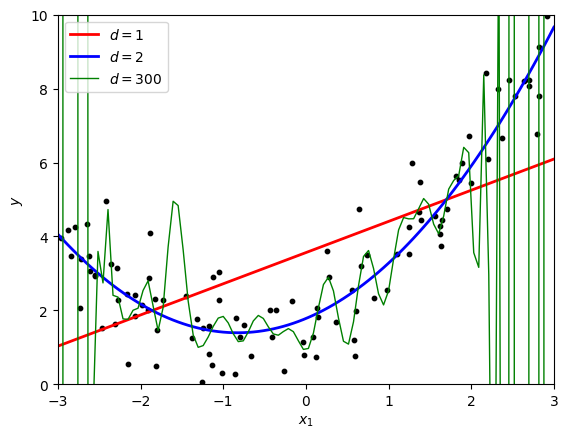

In [ ]:
from sklearn.preprocessing import StandardScaler

# from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

plt.scatter(X, y, color = '#000000', s = 10)

style_width_degree = [('r-', 2, 1),
                      ('b-', 2, 2),
                      ('g-', 1, 300)]

for style, width, degree in style_width_degree:
    poly_features = PolynomialFeatures(degree = degree,
                                       include_bias = False)
    scaler = StandardScaler()
    lin_reg = LinearRegression()

    # polynomial_regression = Pipeline([('poly_features', poly_features),
    #                                   ('scaler', scaler),
    #                                   ('lin_reg', lin_reg)])

    poly_reg = make_pipeline(poly_features,
                             scaler,
                             lin_reg)
    print(poly_reg)

    poly_reg.fit(X, y.ravel())
    y_new = poly_reg.predict(X_new)

    label = '$d = {}$'.format(degree)

    plt.plot(X_new,
             y_new,
             style,
             label = label,
             lw = width)

plt.legend(loc = 'upper left')
plt.xlabel('$x_1$')
plt.ylabel('$y$')

plt.axis([-3, 3, 0, 10])
plt.show()

## 2. Curvas de Aprendizado

São as curvas das medidas de desempenho x os tamanhos do conjunto de treinamento/validação. Lembrando que:

- Se o modelo não tem bom desempenho nem no conjunto de treinamento, nem no conjunto de validação, então o modelo está subajustado (e.g., caso da regressão linear);

- Se o modelo tem um bom desempenho no conjunto de treinamento, mas não no conjunto de validação, então o modelo está sobreajustando (e.g., caso da regressão polinomial com $d=300$);

- Se o modelo tem bom desempenho em ambos os conjuntos, então ele está bem treinado (e.g., caso da regressão polinomial com $d=2$).

### 2.1 Caso da Regressão Linear

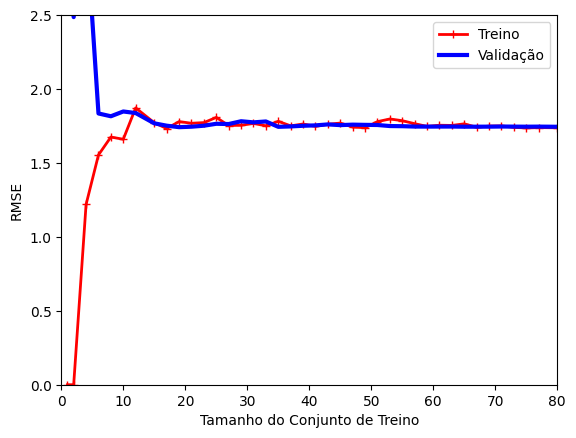

In [ ]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y):
    train_sizes, train_scores, valid_scores = learning_curve(model,
                                                             X,
                                                             y,
                                                             train_sizes = np.linspace(0.01, 1.0, 40),
                                                             cv = 5,
                                                             scoring = 'neg_root_mean_squared_error')

    train_errors = -train_scores.mean(axis = 1)
    valid_errors = -valid_scores.mean(axis = 1)

    plt.plot(train_sizes,
             train_errors,
             'r-+',
             linewidth = 2,
             label = 'Treino')

    plt.plot(train_sizes,
             valid_errors,
             'b-',
             linewidth = 3,
             label = 'Validação')

    plt.legend(loc = 'upper right')
    plt.xlabel('Tamanho do Conjunto de Treino')
    plt.ylabel('RMSE')

    plt.axis([0, 80, 0, 2.5])

    plt.show()

plot_learning_curve(LinearRegression(),
                    X,
                    y.ravel())

### 2.2 Caso da Regressão Polinomial com $d=10$

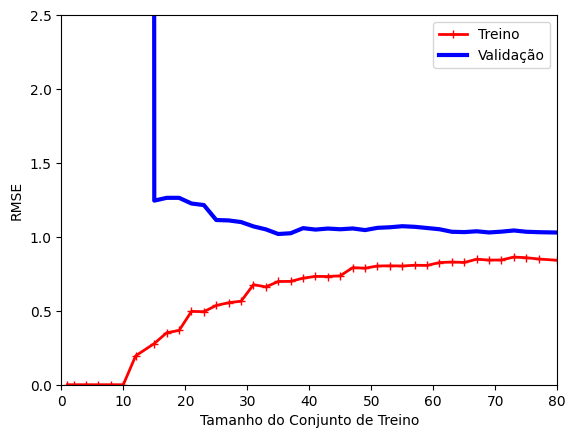

In [ ]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(PolynomialFeatures(degree = 10,
                                                         include_bias = False),
                                      LinearRegression())

plot_learning_curve(polynomial_regression,
                    X,
                    y.ravel()) # The error is lower and there is a gap between the curves

### 2.3 Caso da Regressão Polinomial com $d=2$

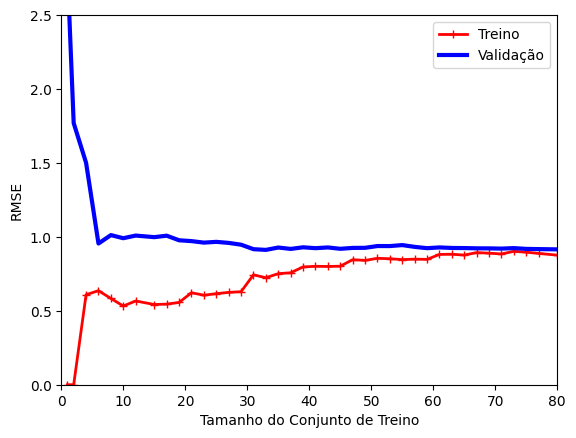

In [ ]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(PolynomialFeatures(degree = 2,
                                                         include_bias = False),
                                      LinearRegression())

plot_learning_curve(polynomial_regression,
                    X,
                    y.ravel())

### 2.4 Trade-off do Viés/Variância

O erro de generalização é composto por três partes:

- Viés: Essa parte do erro de generalização vem de considerações equivocadas sobre o dado (Modelos com alto viés são mais prováveis de subajustar o conjunto de treinamento);

- Variância: Essa parte do erro de generalização vem da sensibilidade do modelo em relação às pequenas variações do conjunto de treinamento
(Modelos com maior variância são mais provável de sobreajustar o conjunto de treinamento).

- Erro irredutível: Essa parte do erro de generalização é do próprio dado.

Portanto,

- Aumentar a complexidade do modelo $\rightarrow$ aumentar a variância $+$ diminuir o viés;

- Reduzir a complexidade do modelo $\rightarrow$ diminuir a variância $+$ aumentar o viés.

![picture](https://drive.google.com/thumbnail?id=19bbw-7bB5JzqNckDy9CWKvZbs1Y9p5zq&sz=w600)

## 3. Modelos Lineares Regularizados

- É uma técnica para reduzir o sobreajuste;

- A regularização só deve ser usada no treinamento do modelo! Depois que o modelo estiver treinado, use uma medida de desempenho não-regularizada como função de custo;

- Geralmente, os dados precisam ser rescalonados para modelos regularizados.

![picture](https://drive.google.com/thumbnail?id=1fPRy_u1saAneXThOcRWxFlGhzqMBpoYp&sz=w2400)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

### 3.1 Regressão Ridge (Regularização de Tikhonov)

A regressão Ridge é definida pela seguinte regularização (ou penalização) da função de custo:

\begin{equation}
    J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + \alpha \frac{1}{2} \sum_{i=1}^n \theta_i^2,
\end{equation}

onde

\begin{equation}
    \text{MSE}(\boldsymbol{\theta}) = \frac{1}{m}\mathbf{e}^T\mathbf{e} = \frac{1}{m}[\mathbf{y}-\hat{\mathbf{y}}(\boldsymbol{\theta})]^T [\mathbf{y}-\hat{\mathbf{y}}(\boldsymbol{\theta})].
\end{equation}

O valor de $\boldsymbol{\theta}$ que a minimiza é dado pela expressão analítica:

\begin{equation}
\widehat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X} + \alpha \mathbf{A})^{-1} \mathbf{X}^T \mathbf{y},
\end{equation}

onde

\begin{equation}
\mathbf{A} = \begin{bmatrix}
                0      & 0      & 0      & \dots  & 0\\
                0      & 1      & 0      & \dots  & 0\\
                0      & 0      & 1      & \dots  & 0\\
                \vdots & \vdots & \vdots & \ddots & \vdots\\
                0      & 0      & 0      & \dots  & 1\\
             \end{bmatrix}
             =
             \begin{bmatrix}
                 0      & \begin{matrix} \dots & 0 \end{matrix}\\
                 \begin{matrix} \vdots \\ 0 \end{matrix} & \mathbf{I}_{n,n}
             \end{bmatrix}.
\end{equation}

Portanto,

- Aumentar o $\alpha$ $\rightarrow$ diminuir os valores de $\{\theta_i\}$.

In [ ]:
np.random.seed(42)

m = 20 # número de instâncias

X = 3 * np.random.rand(m, 1) # simulando valores para a matriz de características (contendo apenas uma característica)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5 # simulando valores para o valor alvo

In [ ]:
ridge_reg = Ridge(alpha = 0.1,
                  solver = 'cholesky')

ridge_reg.fit(X, y.ravel())
ridge_reg.predict([[1.5]])

array([1.55325833])

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty = 'l2',
                       alpha = 0.1,
                       tol = None,
                       max_iter = 1000,
                       eta0 = 0.01,
                       random_state = 42)

sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.54798833])

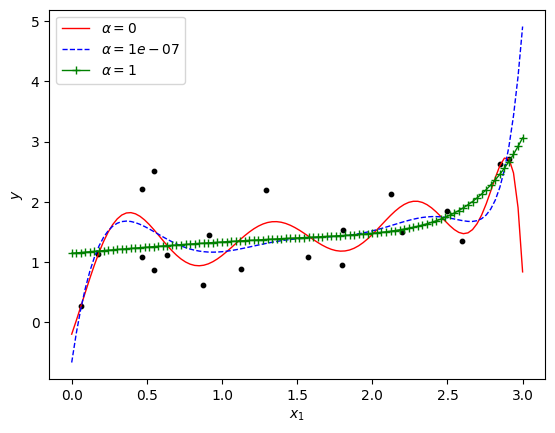

In [ ]:
def plot_regularized_model(X, y, alpha_style, model = 'elastic-net'):
    plt.scatter(X, y, color = '#000000', s = 10)

    X_new = np.linspace(0, 3, 100).reshape(100, 1)

    for alpha, style in alpha_style:
        poly_features = PolynomialFeatures(degree = 10,
                                           include_bias = False)
        scaler = StandardScaler()
        if alpha > 0:
            if model == 'ridge':
                lin_reg = Ridge(alpha = alpha,
                                solver = 'cholesky')
            elif model == 'lasso':
                lin_reg = Lasso(alpha = alpha)
            else: # elastic-net
                lin_reg = ElasticNet(alpha = alpha,
                                     l1_ratio = 0.5)
        else:
            lin_reg = LinearRegression()

        poly_reg = make_pipeline(poly_features,
                                 scaler,
                                 lin_reg)

        poly_reg.fit(X, y.ravel())
        y_new = poly_reg.predict(X_new)

        label = r'$\alpha = {}$'.format(alpha)

        plt.plot(X_new,
                 y_new,
                 style,
                 label = label,
                 lw = width)

    plt.legend(loc = 'upper left')
    plt.xlabel('$x_1$')
    plt.ylabel('$y$')
    plt.show()

alpha_style = [(0, 'r-'),
               (1e-7, 'b--'),
               (1, 'g-+')]

plot_regularized_model(X,
                       y,
                       alpha_style,
                       model = 'ridge')

### 3.2 Regressão Lasso

A regressão Lasso é definida pela seguinte regularização (ou penalização) da função de custo:

\begin{equation}
    J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + \alpha \sum_{i=1}^n |\theta_i|.
\end{equation}

Propriedade:

- Geralmente, os valores de $\alpha$ são menores que aqueles da Regressão Ridge;

- Tende a eliminar as características menos importantes do dado, gerando um modelo de saídas esparsas (i.e., ele gera poucos valores de $\theta_i$ não-nulos).

In [ ]:
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [ ]:
sgd_reg = SGDRegressor(penalty = 'l1',
                       alpha = 0.1,
                       tol = None,
                       max_iter = 1000,
                       eta0 = 0.01,
                       random_state = 42)

sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.53728962])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04
  model = cd_fast.enet_coordinate_descent(


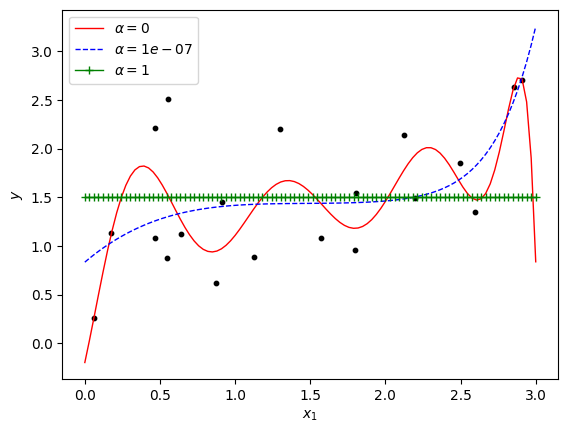

In [ ]:
alpha_style = [(0, 'r-'),
               (1e-7, 'b--'),
               (1, 'g-+')]

plot_regularized_model(X,
                       y,
                       alpha_style,
                       model = 'lasso')

### 3.3 Elastic Net

A regressão Lasso é definida pela seguinte regularização (ou penalização) da função de custo:

\begin{equation}
    J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + r \alpha \sum_{i=1}^n |\theta_i| + (1-r)\alpha \frac{1}{2} \sum_{i=1}^n \theta_i^2.
\end{equation}

Portanto,

- $r=0$ $\rightarrow$ Regressão Ridge;
- $r=1$ $\rightarrow$ Regressão Lasso.

Além disso,

- Evite usar a Regressão Linear limpa e seca;
- Use a Regressão Ridge, mas se você perceber que existem várias características inúteis, use a Regressão Lasso ou a Elastic-net;
- Prefira a Elastic-Net à Regressão Lasso. A Regressão Lasso, por muitas vezes, tem problemas numéricos quando $n>m$ ou quando as características são fortemente correlacionadas.

In [ ]:
elastic_net = ElasticNet(alpha = 0.1,
                         l1_ratio = 0.5)

elastic_net.fit(X, y)

elastic_net.predict([[1.5]])

array([1.54333232])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04
  model = cd_fast.enet_coordinate_descent(


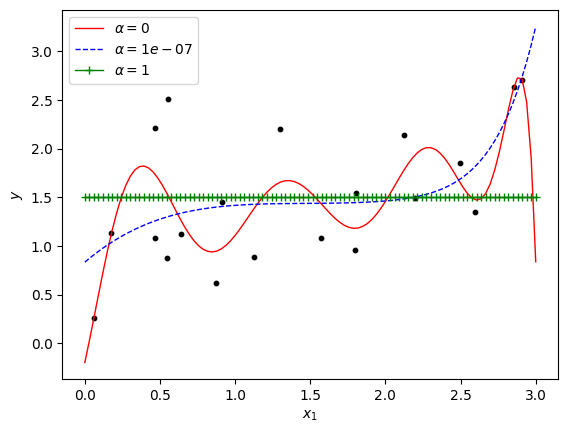

In [ ]:
alpha_style = [(0, 'r-'),
               (1e-7, 'b--'),
               (1, 'g-+')]

plot_regularized_model(X,
                       y,
                       alpha_style,
                       model = 'elastic-net')

## 4. Early Stopping (Parada Antecipada)

É uma técnica que pára o treinamento feito por um Algoritmo de Aprendizado (AA), e.g., o Gradiente Descendente, quando o erro de validação atinge um mínimo.

Além disso,

- Pode ser visto como uma regularização.

In [ ]:
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

m = 100

X = 6 * np.random.rand(m, 1) - 3 # simulando valores para a matriz de características (contendo apenas uma característica)
y = 2 + X + 0.5 * X ** 2 + np.random.randn(m, 1) # simulando valores para o valor alvo

In [ ]:
X.shape, y.shape

((100, 1), (100, 1))

In [ ]:
train_size = m // 2 # 50%

X_train = X[:train_size]
y_train = y.ravel()[:train_size]

X_valid = X[train_size:]
y_valid = y.ravel()[train_size:]

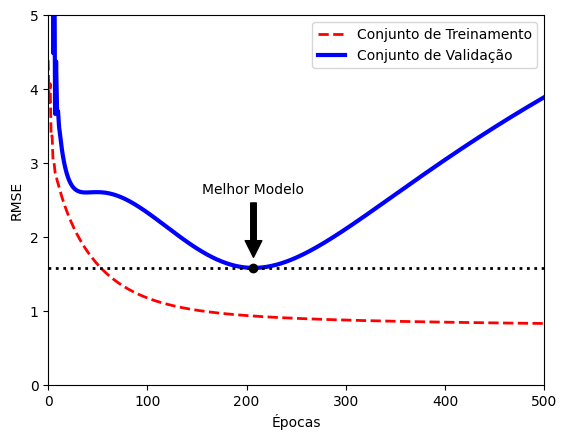

In [ ]:
preprocessing = make_pipeline(PolynomialFeatures(degree = 100, include_bias = False),
                              StandardScaler())

X_train_prep = preprocessing.fit_transform(X_train) # apenas no treinamento
X_valid_prep = preprocessing.transform(X_valid)

sgd_reg = SGDRegressor(penalty = None,
                       eta0 = 0.002,
                       random_state = 42)

n_epochs = 500

best_valid_rmse = np.inf

train_errors = []
val_errors = []
for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)

    y_train_predict = sgd_reg.predict(X_train_prep)
    train_error = mean_squared_error(y_train,
                                     y_train_predict,
                                     squared = False)

    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = mean_squared_error(y_valid,
                                   y_valid_predict,
                                   squared = False)

    val_errors.append(val_error)
    train_errors.append(train_error)

    if val_error < best_valid_rmse:
        best_epoch = epoch
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

plt.plot(train_errors,
         'r--',
         lw = 2,
         label = 'Conjunto de Treinamento')

plt.plot(val_errors,
         'b-',
         lw = 3,
         label = 'Conjunto de Validação')

plt.plot([0, n_epochs],
         [best_valid_rmse, best_valid_rmse],
         'k:',
         linewidth = 2)

plt.plot(best_epoch,
         best_valid_rmse,
         'ko')

plt.annotate('Melhor Modelo',
             xy = (best_epoch, best_valid_rmse + 0.1),
             xytext = (best_epoch, best_valid_rmse + 1.0),
             ha = 'center',
             arrowprops = dict(facecolor = 'black', shrink = 0.05))

plt.legend(loc = 'upper right')
plt.xlabel('Épocas')
plt.ylabel('RMSE')

plt.axis([0, n_epochs, 0, 5])
plt.show()